In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
#np.set_printoptions(suppress=tue)#Optimisation de l'affichage,affichier que qques lignes
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
scoring=pd.read_csv('./credit_scoring.csv',sep=';',header=0)
scoring.head(5)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.000,1.000,60.000,30.000,0.000,1.000,1.000,73.000,129.000,0.000,0.000,800.000,846.000,1
1,17.000,1.000,60.000,58.000,1.000,1.000,0.000,48.000,131.000,0.000,0.000,"1,000.000","1,658.000",1
2,10.000,0.000,36.000,46.000,0.000,2.000,1.000,90.000,200.000,"3,000.000",0.000,"2,000.000","2,985.000",0
3,0.000,1.000,60.000,24.000,1.000,1.000,0.000,63.000,182.000,"2,500.000",0.000,900.000,"1,325.000",1
4,0.000,1.000,36.000,26.000,1.000,1.000,0.000,46.000,107.000,0.000,0.000,310.000,910.000,1


In [ ]:
np.corrcoef(scoring)

array([[1.        , 0.97092327, 0.69017641, ..., 0.14308904, 0.99676912,
        0.3130868 ],
       [0.97092327, 1.        , 0.71300839, ..., 0.16856603, 0.95767971,
        0.32456976],
       [0.69017641, 0.71300839, 1.        , ..., 0.80864871, 0.67560931,
        0.87478522],
       ...,
       [0.14308904, 0.16856603, 0.80864871, ..., 1.        , 0.13269568,
        0.95375965],
       [0.99676912, 0.95767971, 0.67560931, ..., 0.13269568, 1.        ,
        0.30141782],
       [0.3130868 , 0.32456976, 0.87478522, ..., 0.95375965, 0.30141782,
        1.        ]])

<function matplotlib.pyplot.show>

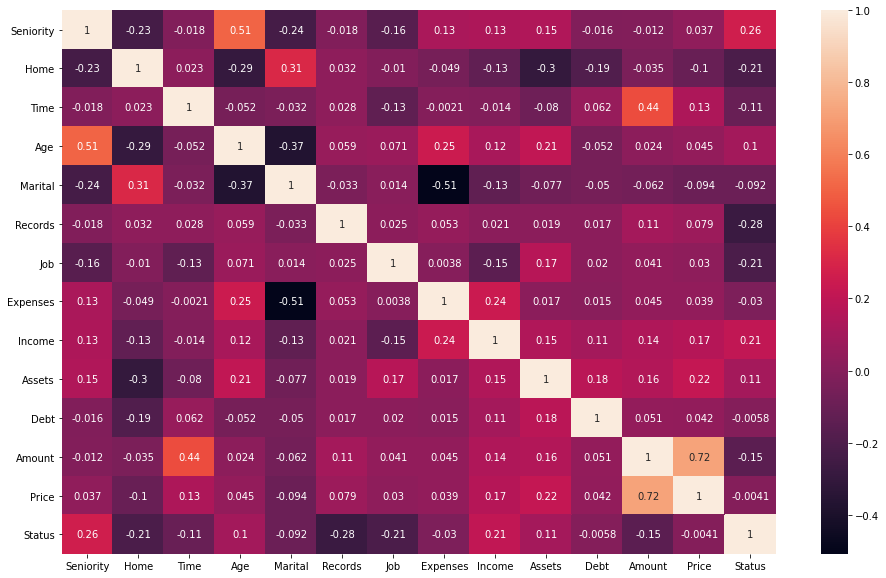

In [ ]:
import seaborn as sns;
plt.figure(figsize=(16,10))
sns.heatmap(scoring.corr(), annot=True)
plt.show

<function matplotlib.pyplot.show>

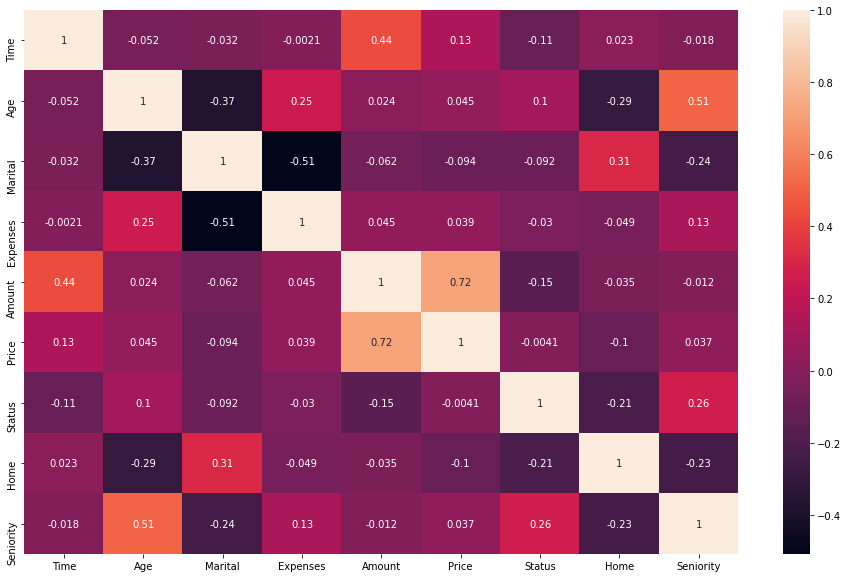

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(scoring[[ 'Time', 'Age', 'Marital','Expenses', 'Amount','Price', 'Status','Home','Seniority' ]].corr(), annot=True)
plt.show

In [ ]:
type(scoring)

pandas.core.frame.DataFrame

In [ ]:
scoring.shape

(4375, 14)

In [ ]:
X= scoring.iloc[:,1:13].values
Y= scoring.iloc[:,13].values

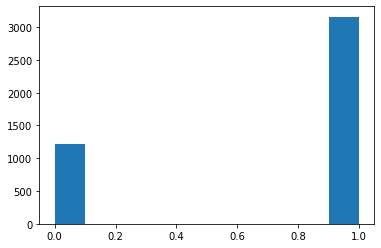

In [ ]:
plt.hist(Y)
plt.show()

In [ ]:
from collections import Counter
histogram=Counter(Y)
print(histogram)

Counter({1: 3159, 0: 1216})


In [ ]:
ep = np.sum(Y == 1)/len(Y)
nep = np.sum(Y == 0)/len(Y)
print('Exicted : {0:.3f} et non : {1:.3f}'.format(ep,nep))


Exicted : 0.722 et non : 0.278


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier 


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=1)

In [ ]:
def ClassifieurExcited(Xtrain,Xtest,Ytrain,Ytest):

 print('DecisionTreeClassifier') 
 DT=DecisionTreeClassifier(random_state=0, criterion='entropy')

 DT.fit(Xtrain,Ytrain)
 YDT=DT.predict(Xtest)

 print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YDT), recall_score(Ytest,YDT)))
 acc1=accuracy_score(Ytest,YDT)
 rec1=recall_score(Ytest,YDT)
 score1=(acc1+rec1)/2
 print()
 print('--> Score 1 = {0:.3f}'.format(score1))
 print()
 print('Matrice de confision')
 print(confusion_matrix(Ytest, YDT))
 print()
 print('###################################')

 print('RandomForestClassifier') 
 RF=RandomForestClassifier(n_estimators=100, random_state=1)

 RF.fit(Xtrain,Ytrain)
 YRF=RF.predict(Xtest)

 print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YRF), recall_score(Ytest,YRF)))
 acc2=accuracy_score(Ytest,YRF)
 rec2=recall_score(Ytest,YRF)
 score2=(acc2+rec2)/2
 print()
 print('--> Score 2 = {0:.3f}'.format(score2))
 print()
 print('Matrice de confision')
 print(confusion_matrix(Ytest, YRF))
 print()
 print('###########################')
 print('MLPClassifier')
 ML=MLPClassifier(hidden_layer_sizes=(20,10),alpha=0.001, max_iter=200)

 ML.fit(Xtrain,Ytrain)
 YML=ML.predict(Xtest)

 print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YML), recall_score(Ytest,YML)))
 acc3=accuracy_score(Ytest,YML)
 rec3=recall_score(Ytest,YML)
 score3=(acc3+rec3)/2
 print()
 print('--> Score 3 = {0:.3f}'.format(score3))
 print()
 print('Matrice de confision')
 print(confusion_matrix(Ytest, YML))
 print()
 print('###########################')
 print('AdaBoostClassifier')
 AdaC=AdaBoostClassifier(n_estimators=100, random_state=0)

 AdaC.fit(Xtrain,Ytrain)
 AdaC.feature_importances_
 YAdaC=AdaC.predict(Xtest)

 print('Accuracy = {0:.3f}, Recall = {1:.3f}'.format(accuracy_score(Ytest,YAdaC), recall_score(Ytest,YAdaC)))
 acc4=accuracy_score(Ytest,YAdaC)
 rec4=recall_score(Ytest,YAdaC)
 score4=(acc4+rec4)/2
 print()
 print('--> Score 4 = {0:.3f}'.format(score4))
 print()
 print('Matrice de confision')
 print(confusion_matrix(Ytest, YAdaC))
 print()

In [ ]:
 ClassifieurExcited(Xtrain,Xtest,Ytrain,Ytest)


DecisionTreeClassifier
Accuracy = 0.718, Recall = 0.805

--> Score 1 = 0.762

Matrice de confision
[[140 152]
 [156 646]]

###################################
RandomForestClassifier
Accuracy = 0.777, Recall = 0.887

--> Score 2 = 0.832

Matrice de confision
[[139 153]
 [ 91 711]]

###########################
MLPClassifier
Accuracy = 0.750, Recall = 0.969

--> Score 3 = 0.860

Matrice de confision
[[ 44 248]
 [ 25 777]]

###########################
AdaBoostClassifier
Accuracy = 0.790, Recall = 0.892

--> Score 4 = 0.841

Matrice de confision
[[149 143]
 [ 87 715]]



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scoring=StandardScaler()
scoring.fit(Xtrain)
Xtrain_norm=scoring.transform(Xtrain)
Xtest_norm=scoring.transform(Xtest)

In [ ]:
ClassifieurExcited (Xtrain_norm,Xtest_norm,Ytrain,Ytest)

DecisionTreeClassifier
Accuracy = 0.718, Recall = 0.804

--> Score 1 = 0.761

Matrice de confision
[[140 152]
 [157 645]]

###################################
RandomForestClassifier
Accuracy = 0.771, Recall = 0.884

--> Score 2 = 0.828

Matrice de confision
[[135 157]
 [ 93 709]]

###########################
MLPClassifier
Accuracy = 0.773, Recall = 0.867

--> Score 3 = 0.820

Matrice de confision
[[151 141]
 [107 695]]

###########################
AdaBoostClassifier
Accuracy = 0.790, Recall = 0.892

--> Score 4 = 0.841

Matrice de confision
[[149 143]
 [ 87 715]]



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametres={'n_estimators':[100,200,300,400,500,600,700,800,900]}

In [ ]:
model=AdaBoostClassifier()
GS=GridSearchCV(model, parametres, cv=5, scoring='accuracy')

In [ ]:
GS.fit(Xtrain,Ytrain)
GS.best_params_

{'n_estimators': 100}

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.pipeline import Pipeline #contient les fichier executable lkol
import pickle #pour stocker les fichiers exécutables
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()

In [ ]:
pca=PCA(n_components=3)
pca.fit(Xtrain)
Xtrain_pca=pca.transform(Xtrain)
Xtest_pca=pca.transform(Xtest)
Xtrain_pca=np.concatenate((Xtrain,Xtrain_pca),axis=1)
Xtest_pca=np.concatenate((Xtest,Xtest_pca),axis=1)

In [ ]:
ClassifieurExcited(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

DecisionTreeClassifier
Accuracy = 0.692, Recall = 0.774

--> Score 1 = 0.733

Matrice de confision
[[136 156]
 [181 621]]

###################################
RandomForestClassifier
Accuracy = 0.772, Recall = 0.883

--> Score 2 = 0.828

Matrice de confision
[[137 155]
 [ 94 708]]

###########################
MLPClassifier
Accuracy = 0.720, Recall = 0.827

--> Score 3 = 0.773

Matrice de confision
[[125 167]
 [139 663]]

###########################
AdaBoostClassifier
Accuracy = 0.783, Recall = 0.890

--> Score 4 = 0.837

Matrice de confision
[[143 149]
 [ 88 714]]



In [ ]:
P=Pipeline([
            ('ss', StandardScaler()),
            ('FU', FeatureUnion([('ss', StandardScaler()),
                                 ('pca', PCA(n_components=3))])),
            ('AD', AdaBoostClassifier(n_estimators=100))
])
P.fit(X,Y)
pickle.dump(P,open('MonClassifieur.pkl','wb'))